In [ ]:
1. Numpy ile Matris İşlemleri
- 5x5 boyutunda rastgele (0-100 arasında) tam sayılardan oluşan bir matris oluşturun.
- Bu matrisin:
  • Ortalama, standart sapma ve varyansını hesaplayın.
  • En büyük ve en küçük değerlerini bulun.
  • Köşegenindeki elemanların toplamını bulun.


In [34]:
import numpy as np

# np.random.seed(42) random sayıları bir kere atar, sonra değiştirmez. 42 yerine başka sayı da yazılabilirmiş.
matris = np.random.randint(0, 100, size=(5, 5))  # matris = np.random.randint(0, 100).reshape(5,5) de yazılabilir.
print("Rastgele Sayılarla Oluşturulan Matris: \n",matris)

ort= np.mean(matris)
print("Matris'in Ortalaması:",ort)

std_sapma= np.std(matris)
print("Matris'in Standart Sapması:",std_sapma)

varyans= np.var(matris)
print("Matris'in Varyansı:",varyans)

max_deger= np.max(matris)
print("Matris'in En Büyük Değeri:",max_deger)

min_deger= np.min(matris)
print("Matris'in En Küçük Değeri:",min_deger)

# kosegen_toplam= np.trace(matris) fonksiyonu ile köşegenler toplamı bulunabilir.
# kosegen_elemanlar= np.diag(matris) köşegen elemanlarını alır.
# kosegen_elemanlar.sum() şeklinde de toplayarak da hesaplanabilir.
kosegen_toplam= matris[0][0]+matris[1][1]+matris[2][2]+matris[3][3]+matris[4][4]
print("Matris'in Köşegenler Toplamı:",kosegen_toplam)

Rastgele Sayılarla Oluşturulan Matris: 
 [[88 91 44 61 71]
 [24 21 10 96 21]
 [40 46 22 60 40]
 [37 21  3 97 67]
 [14 97 81 82 47]]
Matris'in Ortalaması: 51.24
Matris'in Standart Sapması: 29.715019771152768
Matris'in Varyansı: 882.9823999999999
Matris'in En Büyük Değeri: 97
Matris'in En Küçük Değeri: 3
Matris'in Köşegenler Toplamı: 275


In [ ]:
2. Numpy ile Veri Simülasyonu
- 1000 adet öğrencinin sınav puanlarını (0-100 arası, normal dağılımdan gelen) simüle edin.
- Ortalama, medyan ve standart sapmayı hesaplayın.
- 50’den düşük alan kaç öğrenci olduğunu bulun.


In [68]:
import numpy as np

puanlar = np.random.normal(loc=60, scale=40, size=1000)  # normal dağılımda veri elde etmek için kulanılır.
puanlar = np.clip(puanlar, 0, 100) # clip fonksiyonu kırpma/sınırlandırma işlemi yapar.

ort= np.mean(puanlar)
print("Ortalama puan:",ort)

medyan= np.median(puanlar)
print("Puanların medyanı:",medyan)

std_sapma= np.std(puanlar)
print("Puanların standart sapması:",std_sapma)

# ogrenci= np.sum(puanlar>50) de 50'den küçük alan öğrenci sayısını hesaplar.
ogrenci= np.count_nonzero(puanlar<50)
print("50'den düşük alan öğrenci sayısı:",ogrenci)

Ortalama puan: 59.39068810354079
Puanların medyanı: 61.24841459113469
Puanların standart sapması: 30.202714628742562
50'den düşük alan öğrrenci sayısı: 388


In [ ]:
	1. Veri setini Pandas DataFrame olarak oluşturun.
	2. Her ders için ortalama puanı bulun.
	3. En yüksek matematik notunu alan öğrenciyi bulun.
    4. Her öğrencinin not ortalamasını hesaplayan yeni bir sütun ekleyin.
	5. Bölümlere göre gruplayarak her bölümün ortalama başarılarını hesaplayın.
	6. Ortalaması 70’in üzerinde olan öğrencileri filtreleyin.


In [3]:
# Veri setini Pandas DataFrame olarak oluşturun.

import pandas as pd

data={
    "Öğrenci": ["Ali","Ayşe","Mehmet","Zeynep","Ahmet"],
    "Yaş": [20,21,19,22,20],
    "Bölüm": ["Bilgisayar","Fizik","Kimya","Bilgisayar","Fizik"],
    "Matematik": [70,60,80,90,55],
    "Fizik": [65,75,70,85,60],
    "Kimya": [80,85,65,95,70]
}

df=pd.DataFrame(data)
print(df)

  Öğrenci  Yaş       Bölüm  Matematik  Fizik  Kimya
0     Ali   20  Bilgisayar         70     65     80
1    Ayşe   21       Fizik         60     75     85
2  Mehmet   19       Kimya         80     70     65
3  Zeynep   22  Bilgisayar         90     85     95
4   Ahmet   20       Fizik         55     60     70


In [5]:
# Her ders için ortalama puanı bulun.

matematik_ort= df["Matematik"].mean()
print("Matematik Notlarının Ortalaması:",matematik_ort)

fizik_ort= df["Fizik"].mean()
print("Fizik Notlarının Ortalaması:",fizik_ort)

kimya_ort= df["Kimya"].mean()
print("Kimya Notlarının Ortalaması:",kimya_ort)

Matematik Notlarının Ortalaması: 71.0
Fizik Notlarının Ortalaması: 71.0
Kimya Notlarının Ortalaması: 79.0


In [110]:
# En yüksek matematik notunu alan öğrenciyi bulun.

en_yuksek= df["Matematik"].max()  # en_yuksek= df["Matematik"].idxmax() fonk da en yüksek not alan ögrencinin id'sini getirir.
index= df[df["Matematik"]==en_yuksek].index
ogrenci=df["Öğrenci"][index].values[0]
print(f"En yüksek matematik notunu alan öğrenci: {ogrenci}  Puanı: {en_yuksek}")

En yüksek matematik notunu alan öğrenci: Zeynep  Puanı: 90


In [114]:
# Her öğrencinin not ortalamasını hesaplayan yeni bir sütun ekleyin.

# df["Ortalama"]= df[["Matematik","Fizik","Kimya"]].mean(axis=1) ile de hesaplanabilir.
df["Ortalama"]= (df["Matematik"]+df["Fizik"]+df["Kimya"])/3 
print(df)

  Öğrenci  Yaş       Bölüm  Matematik  Fizik  Kimya   Ortalama
0     Ali   20  Bilgisayar         70     65     80  71.666667
1    Ayşe   21       Fizik         60     75     85  73.333333
2  Mehmet   19       Kimya         80     70     65  71.666667
3  Zeynep   22  Bilgisayar         90     85     95  90.000000
4   Ahmet   20       Fizik         55     60     70  61.666667


In [126]:
# Bölümlere göre gruplayarak her bölümün ortalama başarılarını hesaplayın.

# bolum_ort = df.groupby("Bölüm")[["Matematik"],["Fizik"],["Kimya"],["Ortalama"]].mean()
# bolum_ort.round(2) şeklinde de her grubun ortalama başarısını hesaplayabiliriz.
gruplama= df.groupby("Bölüm")["Ortalama"].mean()
print(gruplama)

Bölüm
Bilgisayar    80.833333
Fizik         67.500000
Kimya         71.666667
Name: Ortalama, dtype: float64


In [116]:
# Ortalaması 70’in üzerinde olan öğrencileri filtreleyin.

filtreleme= df[df["Ortalama"]>=70]
print(filtreleme)

  Öğrenci  Yaş       Bölüm  Matematik  Fizik  Kimya   Ortalama
0     Ali   20  Bilgisayar         70     65     80  71.666667
1    Ayşe   21       Fizik         60     75     85  73.333333
2  Mehmet   19       Kimya         80     70     65  71.666667
3  Zeynep   22  Bilgisayar         90     85     95  90.000000


In [ ]:
3. Ek Görev (Opsiyonel)
Matplotlib veya Seaborn kullanarak:
  • Her dersin dağılımını histogram ile gösterin.
  • Bölümlere göre ortalamaları bar grafikte görselleştirin.

<Axes: ylabel='Frequency'>

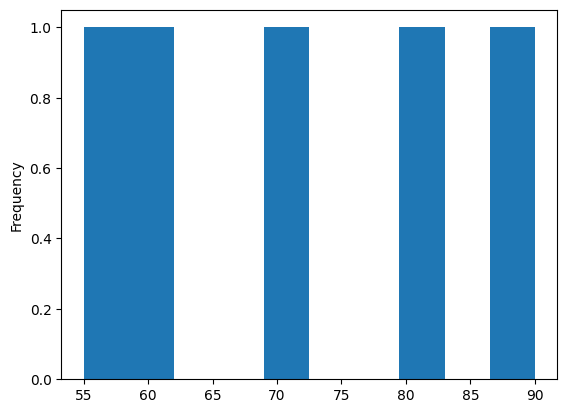

In [128]:
# Her dersin dağılımını histogram ile gösterin.

import matplotlib.pyplot as plt

df["Matematik"].plot(kind='hist')


<Axes: ylabel='Frequency'>

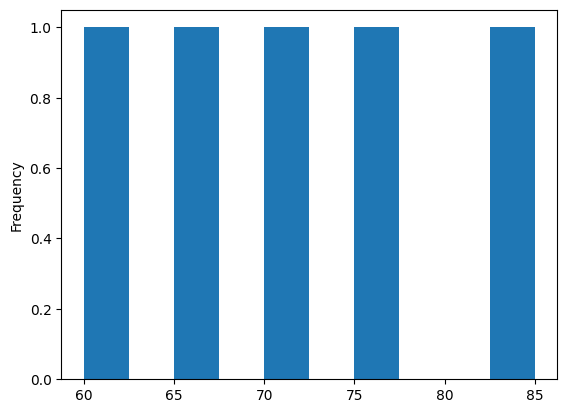

In [130]:
df["Fizik"].plot(kind='hist')

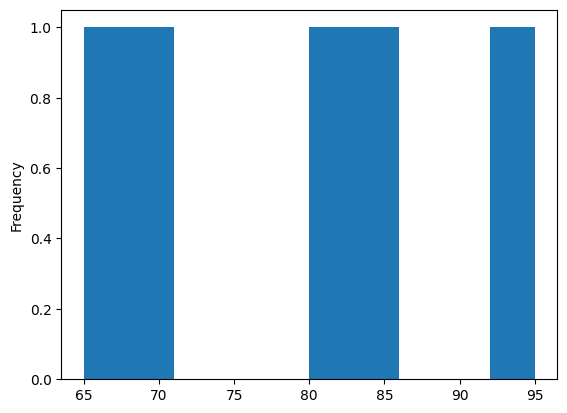

In [134]:
df["Kimya"].plot(kind='hist')


<BarContainer object of 3 artists>

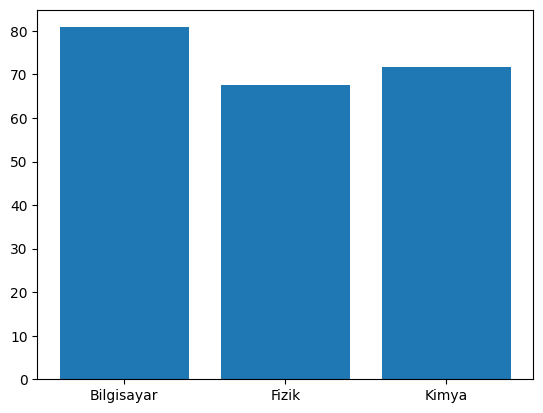

In [138]:
# Bölümlere göre ortalamaları bar grafikte görselleştirin.

plt.bar(gruplama.index, gruplama.values)